In [ ]:
import sys
import importlib
import random
from collections import defaultdict
# sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

show=True
if '--save' in sys.argv:
    show=False


'''Load data'''
import compress_pickle
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_xlim_320_560_zlim_10_40.gz')

pc_width = 160000  # empirically found across PCs
# pfs_spread = 100000
num_trials = 100
# num_trials = 2

# stretch_factor = 1.25  # stretch 240um to 300um width
stretch_factor = 1  # stretch 240um to 300um width

# get PC center
min_x = sys.maxsize
max_x = -sys.maxsize
for grc_id, grc in input_graph.grcs.items():
    x, y, z = grc.soma_loc
    min_x = min(x, min_x)
    max_x = max(x, max_x)
center_x = (min_x+max_x)/2
center_x *= stretch_factor

convergence_range = ((center_x-pc_width*0.5), (center_x+pc_width*0.5))
print(f'convergence_range: {convergence_range}')

# get grcs, simulate pf locations, filter out, then count # of unique mfs in the convergence

def simulate(graph, pfs_spread, pc_width):
    converged_grcs = []
    for grc_id, grc in graph.grcs.items():
        x, _, _ = grc.soma_loc
        x *= stretch_factor
        pf_delta = (random.random()-.5)*pfs_spread
        pf_x = x + pf_delta
        if pf_x > convergence_range[0] and pf_x < convergence_range[1]:
            converged_grcs.append(grc_id)
    converged_mfs = set()
    for grc_id in converged_grcs:
        converged_mfs |= graph.grcs[grc_id].mfs
    return len(converged_mfs), len(converged_grcs)

convergence_range: (359840.0, 519840.0)
Height: 4, Aspect: 1.33


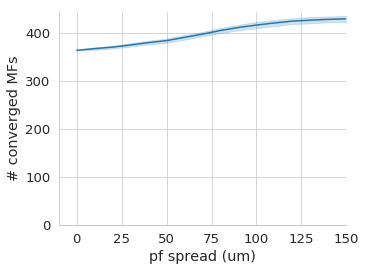

Height: 4, Aspect: 1.33


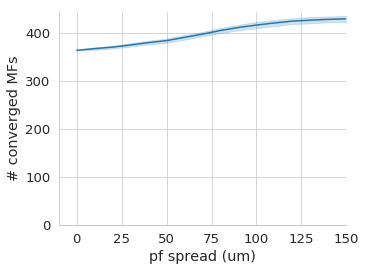

In [3]:
mpd = MyPlotData()
ref_n_grc = None
ref_n_mfs = None
for pfs_spread in range(0, 201, 10):
    # print("pfs_spread:", pfs_spread)
    pfs_spread = pfs_spread*1000  # to nm
    for n_trial in range(num_trials):
        n_mfs, n_grc = simulate(input_graph, pfs_spread, pc_width)
        if ref_n_grc is None:
            ref_n_grc = n_grc
            ref_n_mfs = n_mfs
        # print((n_mfs, n_grc))
        mpd.add_data_point(
            pfs_spread=pfs_spread/1000,
            n_grc=n_grc,
            n_mfs=n_mfs,
            n_grc_ratio=n_grc/ref_n_grc,
            n_mfs_ratio=n_mfs/ref_n_mfs,
            n_trial=n_trial,
            )

Height: 4, Aspect: 1.33


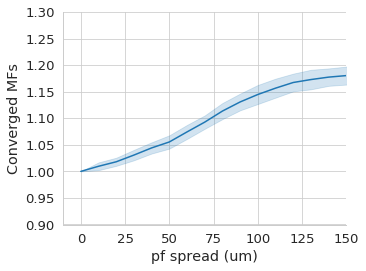

In [8]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x="pfs_spread",
    # y="n_mfs",
    y="n_mfs_ratio",
    y_axis_label='Converged MFs',
    x_axis_label='pf spread (um)',
    context='paper',
    xlim=[None, 150],
    ylim=[.9, 1.3],
    height=4,
    # aspect=1,
    # kind=f'{kind}',
    kind='line',
    save_filename='axon_spread_convergence.svg',
    show=show,
    )
